#### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Import data from CSV file

In [2]:
pokemon = pd.read_csv("pokemon.csv")

#### Number of rows and columns

In [35]:
print(pokemon.shape)
print(pokemon.shape[0])
print(pokemon.shape[1])

(800, 12)
800
12


#### Show head and tail of rows of data frame

In [4]:
pokemon.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
pokemon.tail(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


#### Show structure of data

In [6]:
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

#### Summary of the data set


In [7]:
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


#### Remove unique identifiers (pokemon number and Name) from further analysis.


In [8]:
pokemon.drop(columns=['#', 'Name'])

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,45,49,49,65,65,45,1,False
1,Grass,Poison,60,62,63,80,80,60,1,False
2,Grass,Poison,80,82,83,100,100,80,1,False
3,Grass,Poison,80,100,123,122,120,80,1,False
4,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,50,100,150,100,150,50,6,True
796,Rock,Fairy,50,160,110,160,110,110,6,True
797,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Psychic,Dark,80,160,60,170,130,80,6,True


In [9]:
pokemon["Type 2"].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Water       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

#### Show summary of one or more columns

In [10]:
pokemon.Attack.describe()
pokemon['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

In [11]:
pokemon[['Attack','Defense']].describe()

,Attack,Defense
count,800.000000,800.000000
mean,79.001250,73.842500
std,32.457366,31.183501
min,5.000000,5.000000
25%,55.000000,50.000000
50%,75.000000,70.000000
75%,100.000000,90.000000
max,190.000000,230.000000


#### obtain the mean, median, and range of a numeric variable

In [12]:
pokemon['Attack'].mean()

79.00125

In [13]:
pokemon['Attack'].median()

75.0

In [38]:
min = pokemon['Attack'].min()
max = pokemon['Attack'].max()

print(min)
print(max)

5
190


#### use quantile to calculate the five-number summary for Attack

In [15]:
pokemon['Attack'].quantile([0, .25, .5, .75, 1]) 

0.00      5.0
0.25     55.0
0.50     75.0
0.75    100.0
1.00    190.0
Name: Attack, dtype: float64

#### IQR

In [16]:
q75, q25 = np.percentile(pokemon['Attack'], [75 ,25])
q75 - q25

45.0

### BoxPlot

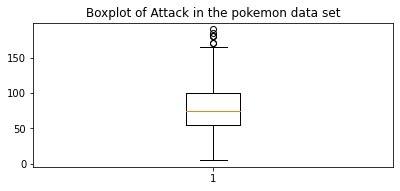

In [17]:
fig = plt.figure(figsize =(5, 4)) 
  
#creating axes instance 
ax = fig.add_axes([0, 0, 1, 0.5]) 
  
#creating plot 
bp = ax.boxplot(pokemon['Attack']) 

#adding the title to plot
plt.title("Boxplot of Attack in the pokemon data set") 

#show plot 
plt.show() 

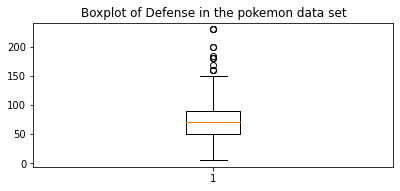

In [44]:
fig = plt.figure(figsize =(5, 4)) 
  
#creating axes instance 
ax = fig.add_axes([0, 0, 1, 0.5]) 
  
#creating plot 
bp = ax.boxplot(pokemon['Defense']) 

#adding the title to plot
plt.title("Boxplot of Defense in the pokemon data set") 

#show plot 
plt.show() 

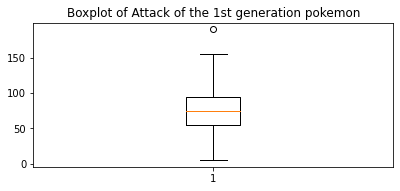

In [19]:
gen_one = pokemon[pokemon['Generation']==1]

fig = plt.figure(figsize =(5, 4)) 
  
#creating axes instance 
ax = fig.add_axes([0, 0, 1, 0.5]) 
  
#creating plot 
bp = ax.boxplot(gen_one['Attack']) 

#adding the title to plot
plt.title("Boxplot of Attack of the 1st generation pokemon") 

#show plot 
plt.show() 

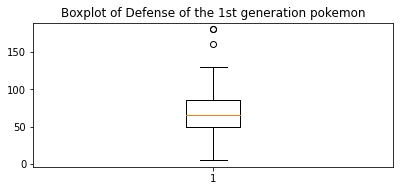

In [42]:
fig = plt.figure(figsize =(5, 4)) 
  
#creating axes instance 
ax = fig.add_axes([0, 0, 1, 0.5]) 
  
#creating plot 
bp = ax.boxplot(gen_one['Defense']) 

#adding the title to plot
plt.title("Boxplot of Defense of the 1st generation pokemon") 

#show plot 
plt.show() 

### Histogram

Text(0, 0.5, 'Frequency')

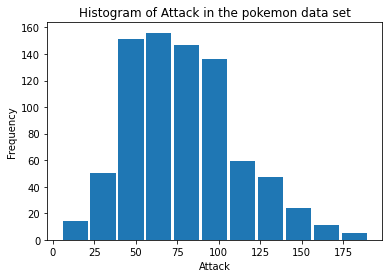

In [21]:
# using surges here for bins to match histograms as R plots.
plt.hist(pokemon['Attack'], bins="sturges",rwidth=0.9) 
plt.title('Histogram of Attack in the pokemon data set')
plt.xlabel('Attack')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

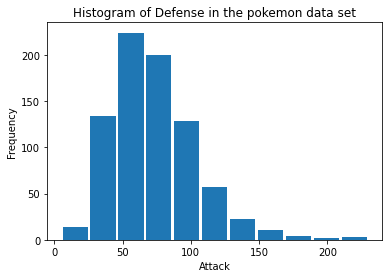

In [22]:
# using surges here for bins to match histograms as R plots.
plt.hist(pokemon['Defense'], bins="sturges" ,rwidth=0.9)
plt.title('Histogram of Defense in the pokemon data set')
plt.xlabel('Attack')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

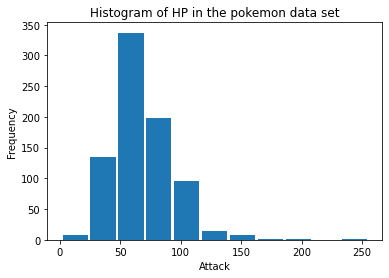

In [23]:
# using surges here for bins to match histograms as R plots.
plt.hist(pokemon['HP'], bins="sturges" ,rwidth=0.9)
plt.title('Histogram of HP in the pokemon data set')
plt.xlabel('Attack')
plt.ylabel('Frequency')

### Variance and Standard Deviation

In [24]:
print(pokemon['Attack'].var())
print(pokemon['Attack'].std())

1053.4805991864816
32.45736586949843


In [25]:
pd.Categorical(pokemon['Type 2'])

pd.Categorical(pokemon['Type 2']).describe()
print(len(pokemon['Type 2'].unique())-1) # -1 is to remove NaN from list

18


#### Catergories, value counts and percentage

In [26]:
pokemon["Type 1"].value_counts()
pokemon["Type 1"].value_counts().sort_values()

Flying        4
Fairy        17
Ice          24
Fighting     27
Steel        27
Poison       28
Dark         31
Ground       32
Dragon       32
Ghost        32
Rock         44
Electric     44
Fire         52
Psychic      57
Bug          69
Grass        70
Normal       98
Water       112
Name: Type 1, dtype: int64

In [27]:
pokemon["Type 1"].value_counts() / len(pokemon)

Water       0.14000
Normal      0.12250
Grass       0.08750
Bug         0.08625
Psychic     0.07125
Fire        0.06500
Rock        0.05500
Electric    0.05500
Ghost       0.04000
Dragon      0.04000
Ground      0.04000
Dark        0.03875
Poison      0.03500
Steel       0.03375
Fighting    0.03375
Ice         0.03000
Fairy       0.02125
Flying      0.00500
Name: Type 1, dtype: float64

#### Plot categoricaal variable

Text(0.5, 0, 'Type 1')

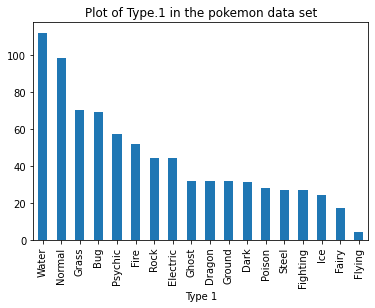

In [28]:
pokemon['Type 1'].value_counts().plot(kind='bar')
plt.title('Plot of Type.1 in the pokemon data set')
plt.xlabel('Type 1')

#### Scatter plot

Text(0, 0.5, 'Defense')

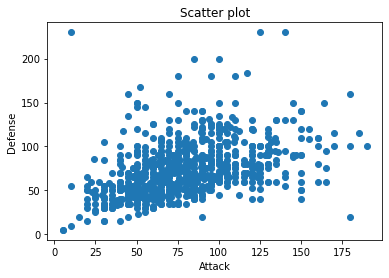

In [29]:
plt.scatter(pokemon.Attack, pokemon.Defense)
plt.title('Scatter plot')
plt.xlabel('Attack')
plt.ylabel('Defense')

#### Correlation matrix

In [30]:
pd.DataFrame(pokemon,columns=['Attack','Defense']).corr()

,Attack,Defense
Attack,1.000000,0.438687
Defense,0.438687,1.000000


In [31]:
pd.DataFrame(pokemon,columns=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']).corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


#### Generate 2D scatter plots

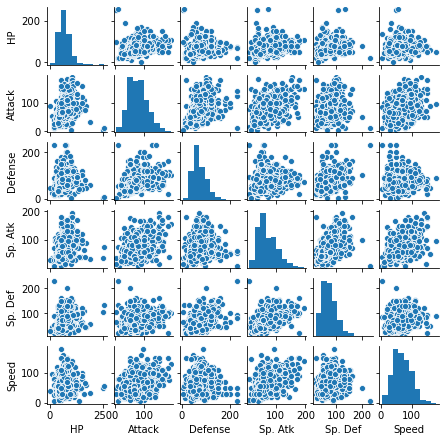

In [32]:
import seaborn as sns
pokemong = pd.DataFrame(pokemon, columns=['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'])
sns.pairplot(pokemong, height=1)